In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
path = "Clase 13 - examen simulacro.csv"
df_1 = pd.read_csv(path,encoding='latin1',sep=';')
df_1


,Country,UNICEF Region,Year,Sex,Age,Estimated incidence rate of new HIV infection per 1 000 uninfected population,Estimated number of annual AIDS related deaths,Estimated number of annual new HIV infections,Estimated number of people living with HIV,Estimated rate of annual AIDS related deaths per 100 000 population
0,Angola,Eastern and Southern Africa,1990,Female,Age 10-19,0.64,100.0,500.0,860,0.36
1,Angola,Eastern and Southern Africa,1990,Male,Age 10-19,0.15,100.0,100.0,200,0.07
2,Angola,Eastern and Southern Africa,1991,Female,Age 10-19,0.75,100.0,500.0,1100,0.42
3,Angola,Eastern and Southern Africa,1991,Male,Age 10-19,0.17,100.0,200.0,500,0.14
4,Angola,Eastern and Southern Africa,1992,Female,Age 10-19,0.88,100.0,590.0,1300,0.54
...,...,...,...,...,...,...,...,...,...,...
2637,Zimbabwe,Eastern and Southern Africa,2017,Male,Age 10-19,NaN,900.0,1200.0,37000,57.28
2638,Zimbabwe,Eastern and Southern Africa,2018,Female,Age 10-19,6.05,770.0,4400.0,48000,48.39
2639,Zimbabwe,Eastern and Southern Africa,2018,Male,Age 10-19,NaN,800.0,1100.0,37000,49.97
2640,Zimbabwe,Eastern and Southern Africa,2019,Female,Age 10-19,5.99,690.0,4400.0,48000,42.18


In [17]:
# verificar si existen valores nulos en la tabla
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Country                                                                                   2642 non-null   object 
 1   UNICEF Region                                                                             2574 non-null   object 
 2   Year                                                                                      2642 non-null   int64  
 3   Sex                                                                                       2642 non-null   object 
 4   Age                                                                                       2641 non-null   object 
 5             Estimated incidence rate of new HIV infection

In [18]:
# Reviso la columa UNICEF Region si hay valores nulos
df_1['UNICEF Region'].isnull().sum()

np.int64(68)

In [19]:
# Revisar la misma columna para ver los valores únicos
df_1['UNICEF Region'].unique()

array(['Eastern and Southern Africa', 'West and Central Africa', nan],
      dtype=object)

In [22]:
# Relleno de datos vacios 
dict = {
    "Central African Republic": "West and Central Africa",
    "Cameroon":"Weest and Central Africa",
    "Congo": "west and Central Africa",
    "Eritrea": "Eastern and Southern Africa"
}
# rellenar los datos vacios con el valor del diccionario creado
df_1['UNICEF Region'] = df_1['UNICEF Region'].fillna(df_1['Country'].map(dict))

In [23]:
# verificamos 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Country                                                                                   2642 non-null   object 
 1   UNICEF Region                                                                             2642 non-null   object 
 2   Year                                                                                      2642 non-null   int64  
 3   Sex                                                                                       2642 non-null   object 
 4   Age                                                                                       2641 non-null   object 
 5             Estimated incidence rate of new HIV infection

In [30]:
# Rellenar  el dato faltante de la columna "Age" del pais "Djibouni"
df_1.loc[df_1['Country'] == 'Djibouti', 'Age'] = 10-19
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Country                                                                                   2642 non-null   object 
 1   UNICEF Region                                                                             2642 non-null   object 
 2   Year                                                                                      2642 non-null   int64  
 3   Sex                                                                                       2642 non-null   object 
 4   Age                                                                                       2642 non-null   object 
 5             Estimated incidence rate of new HIV infection

In [36]:
df_1.columns = df_1.columns.str.strip()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2520 non-null   float64
 6   Estimated number of annu

In [ ]:
# De acuerdo a la informacion de mali desde el año 1990 - 2017, el valor de la incidencia del VIH en Mali es 0.17 % por cada 1000 personas infectadas
df_1.loc[
    (df_1['Country'] == 'Mali') &
    (df_1['Estimated incidence rate of new HIV infection per 1 000 uninfected population'].isna()),
    'Estimated incidence rate of new HIV infection per 1 000 uninfected population'
] = 0.17
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2580 non-null   float64
 6   Estimated number of annu

In [43]:
# De acuerdo a la informacion de mauritania desde el año 1990 - 2017, el valor de la incidencia del VIH en Mali es 0.6 % ppor cada 1000 personas  infectadas
df_1.loc[
    (df_1['Country'] == 'Mauritania') &
    (df_1['Estimated incidence rate of new HIV infection per 1 000 uninfected population'].isna()),
    'Estimated incidence rate of new HIV infection per 1 000 uninfected population'
] = 0.6
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2640 non-null   float64
 6   Estimated number of annu

In [45]:
# De acuerdo a la informacion de zimbabwe desde el año  2017-2018, el valor de la incidencia del VIH en Mali es 12.5 % ppor cada 1000 personas  infectadas
df_1.loc[
    (df_1['Country'] == 'Zimbabwe') &
    (df_1['Estimated incidence rate of new HIV infection per 1 000 uninfected population'].isna()),
    'Estimated incidence rate of new HIV infection per 1 000 uninfected population'
] = 12.5

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2642 non-null   float64
 6   Estimated number of annu

In [47]:
df_1.loc[
    (df_1['Country'] == 'Mauritius') &
    (df_1['Estimated number of annual AIDS related deaths'].isna()),
    'Estimated number of annual AIDS related deaths'
] = 1.7

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2642 non-null   float64
 6   Estimated number of annu

In [54]:
# Rellenar datos de la columna Estimated number of annual new HIV infections  de mali
df_1.loc[
    (df_1['Country'] == 'Mali') &
    (df_1['Estimated number of annual new HIV infections'].isna()),
    'Estimated number of annual new HIV infections'
] = 0.9

df_1.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2642 non-null   float64
 6   Estimated number of annu

In [ ]:
# Rellenar datos de la columna Estimated number of annual new HIV infections  de mali
df_1.loc[
    (df_1['Country'] == 'Mauritania') &
    (df_1['Estimated number of annual new HIV infections'].isna()),
    'Estimated number of annual new HIV infections'
] = 0.3

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2642 non-null   float64
 6   Estimated number of annu

In [ ]:
# Rellenar datos de la columna Estimated number of annual new HIV infections  de zimbabwe

df_1.loc[
    (df_1['Country'] == 'Kenya') &
    (df_1['Estimated number of annual new HIV infections'].isna()),
    'Estimated number of annual new HIV infections'
] = 3.7

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2642 non-null   float64
 6   Estimated number of annu

In [ ]:
#Rellenar datos de la columna Estimated rate of annual AIDS related deaths  per 100 000 population de mali

df_1.loc[
    (df_1['Country'] == 'Mauritius') &
    (df_1['Estimated rate of annual AIDS related deaths  per 100 000 population'].isna()),
    'Estimated rate of annual AIDS related deaths  per 100 000 population'
] = 9.81

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Country                                                                        2642 non-null   object 
 1   UNICEF Region                                                                  2642 non-null   object 
 2   Year                                                                           2642 non-null   int64  
 3   Sex                                                                            2642 non-null   object 
 4   Age                                                                            2642 non-null   object 
 5   Estimated incidence rate of new HIV infection per 1 000 uninfected population  2642 non-null   float64
 6   Estimated number of annu

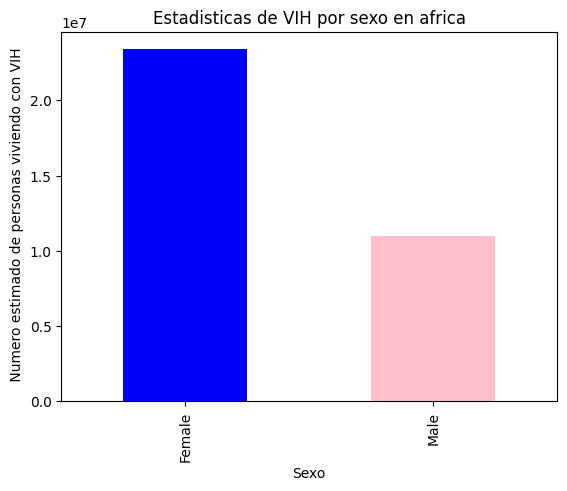

In [87]:
# El contagio de VIH afecta más a hombres o mujeres? Acompaña tu analisis de almenos un grafico y explicar
df_1.groupby("Sex")["Estimated number of people living with HIV"].sum().plot(kind='bar', color=['blue', 'pink'])
plt.title("Estadisticas de VIH por sexo en africa")
plt.ylabel(" Numero estimado de personas viviendo con VIH")
plt.xlabel("Sexo")
plt.show()



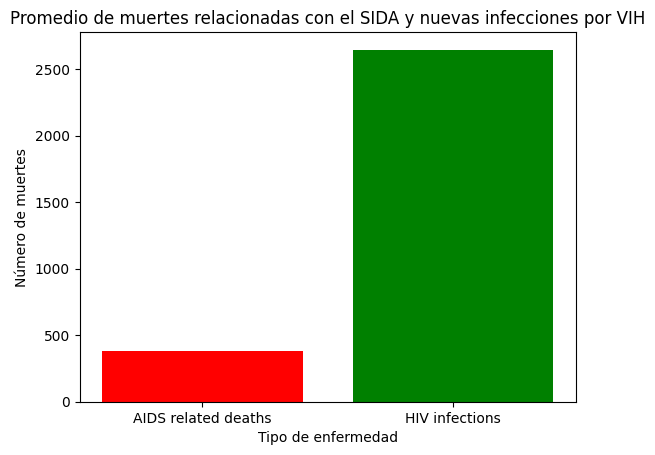

In [91]:
# Los contagios y muertes han venido creciendo o disminuyendo con los años?
average_aids_deaths = df_1["Estimated number of annual AIDS related deaths"].mean()
average_hiv_infections = df_1["Estimated number of annual new HIV infections"].mean()

plt.bar(['AIDS related deaths', 'HIV infections'], [average_aids_deaths, average_hiv_infections], color=['red', 'green'])
plt.title("Promedio de muertes relacionadas con el SIDA y nuevas infecciones por VIH")
plt.ylabel("Número de muertes")
plt.xlabel("Tipo de enfermedad")
plt.show()

